In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


In [2]:
df_cars = pd.read_csv("auto-mpg.csv")

In [3]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
df_cars.info()

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df_cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df_cars.horsepower.values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', '?', '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', '?', '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

In [7]:
df_cars['car name'].values

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'datsun pl510', 'chevrolet vega 2300',
       'toyota corona', 'ford pinto', 'amc gremlin',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'chevrolet impala',
       'pontiac catalina brougham', 'ford galaxie 500',
       'plymouth fury iii', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
 

In [8]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)

C:\Users\Diwakar\AppData\Local\Temp/ipykernel_15044/2378017460.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)


In [9]:
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)

In [10]:
df_cars.horsepower.values

array([130.        , 165.        , 150.        , 150.        ,
       140.        , 198.        , 220.        , 215.        ,
       225.        , 190.        , 170.        , 160.        ,
       150.        , 225.        ,  95.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        ,  95.        , 113.        ,
        90.        , 215.        , 200.        , 210.        ,
       193.        ,  88.        ,  90.        ,  95.        ,
       104.46938776, 100.        , 105.        , 100.        ,
        88.        , 100.        , 165.        , 175.        ,
       153.        , 150.        , 180.        , 170.        ,
       175.        , 110.        ,  72.        , 100.        ,
        88.        ,  86.        ,  90.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        70.        ,  95.        ,  80.        ,  54.        ,
        90.        ,  86.        , 165.        , 175.  

In [11]:
df_cars['car name'].values

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'datsun pl510', 'chevrolet vega 2300',
       'toyota corona', 'ford pinto', 'amc gremlin',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'chevrolet impala',
       'pontiac catalina brougham', 'ford galaxie 500',
       'plymouth fury iii', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
 

In [12]:
df_cars['name']=df_cars['car name']

In [13]:
df_cars['name'].values

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'datsun pl510', 'chevrolet vega 2300',
       'toyota corona', 'ford pinto', 'amc gremlin',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'chevrolet impala',
       'pontiac catalina brougham', 'ford galaxie 500',
       'plymouth fury iii', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
 

In [14]:
df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda')
df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
df_cars['name'] = df_cars['name'].str.replace('vokswagen|volkswagen|vw','volkswagen')

C:\Users\Diwakar\AppData\Local\Temp/ipykernel_15044/2380514268.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
C:\Users\Diwakar\AppData\Local\Temp/ipykernel_15044/2380514268.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('maxda|mazda','mazda')
C:\Users\Diwakar\AppData\Local\Temp/ipykernel_15044/2380514268.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
C:\Users\Diwakar\AppData\Local\Temp/ipykernel_15044/2380514268.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
C:\Users\Diwak

In [15]:
df_cars.groupby(['name'])

In [16]:
df_cars.groupby(['name']).sum()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175.0,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150.0,3672,11.5,72,1
amc concord,43.7,10,383.0,180.0,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120.0,3410,15.1,78,1
...,...,...,...,...,...,...,...,...
volvo 145e (sw),18.0,4,121.0,112.0,2933,14.5,72,2
volvo 244dl,22.0,4,121.0,98.0,2945,14.5,75,2
volvo 245,20.0,4,130.0,102.0,3150,15.7,76,2


In [17]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [18]:
pp=list(set(df_cars['name'].values))
pp

['datsun 210',
 'ford escort 4w',
 'datsun 200sx',
 'mazda rx3',
 'pontiac grand prix lj',
 'cadillac eldorado',
 'dodge aries se',
 'pontiac firebird',
 'plymouth horizon',
 'chevrolet camaro',
 'dodge omni',
 'ford ltd',
 'datsun b-210',
 'ford torino',
 'amc ambassador brougham',
 'pontiac j2000 se hatchback',
 'dodge challenger se',
 'volkswagen 1131 deluxe sedan',
 'plymouth volare',
 'ford f250',
 'toyota corona liftback',
 'volkswagen type 3',
 'ford mustang ii 2+2',
 'plymouth valiant',
 'audi 100ls',
 'honda civic',
 'oldsmobile omega brougham',
 'audi fox',
 'renault 18i',
 'subaru dl',
 'ford galaxie 500',
 'dodge aspen 6',
 'ford f108',
 'dodge dart custom',
 'plymouth arrow gs',
 'ford fiesta',
 'toyota mark ii',
 'buick century special',
 'ford torino 500',
 'chevrolet nova',
 'dodge coronet brougham',
 'renault lecar deluxe',
 'fiat 124b',
 'datsun 810 maxima',
 'volvo 245',
 'amc hornet sportabout (sw)',
 'fiat x1.9',
 'dodge magnum xe',
 'datsun 510',
 'mazda 626',
 'f

In [19]:
pp1=df_cars['name'].str.strip()

In [20]:
pp1

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394            volkswagen pickup
395                dodge rampage
396                  ford ranger
397               chevrolet s-10
Name: name, Length: 398, dtype: object

In [21]:
type(pp1)

pandas.core.series.Series

In [22]:
df_cars['name']=[x.split()[0] for x in pp1]

In [23]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford


In [24]:
df_cars=df_cars.drop('car name',axis=1)

In [25]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


In [26]:
df_cars.mpg.kurt()

-0.5107812652123154

In [27]:
#df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [28]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [29]:
#cData = pd.get_dummies(df_cars, columns=['origin'])

In [30]:
#cData

In [31]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


C:\Users\Diwakar\Anaconda3\envs\keras-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


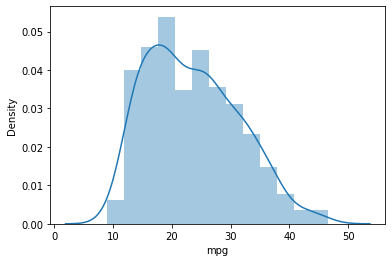

In [32]:
sns_plot = sns.distplot(df_cars["mpg"])

In [33]:
mpgval = df_cars.mpg.values

In [34]:
mpgval = df_cars.mpg.values

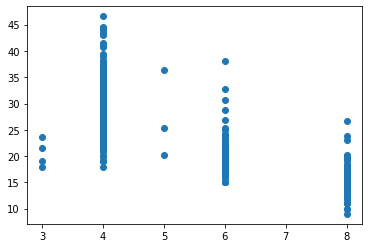

In [35]:
plt.scatter(df_cars.cylinders.values,mpgval)

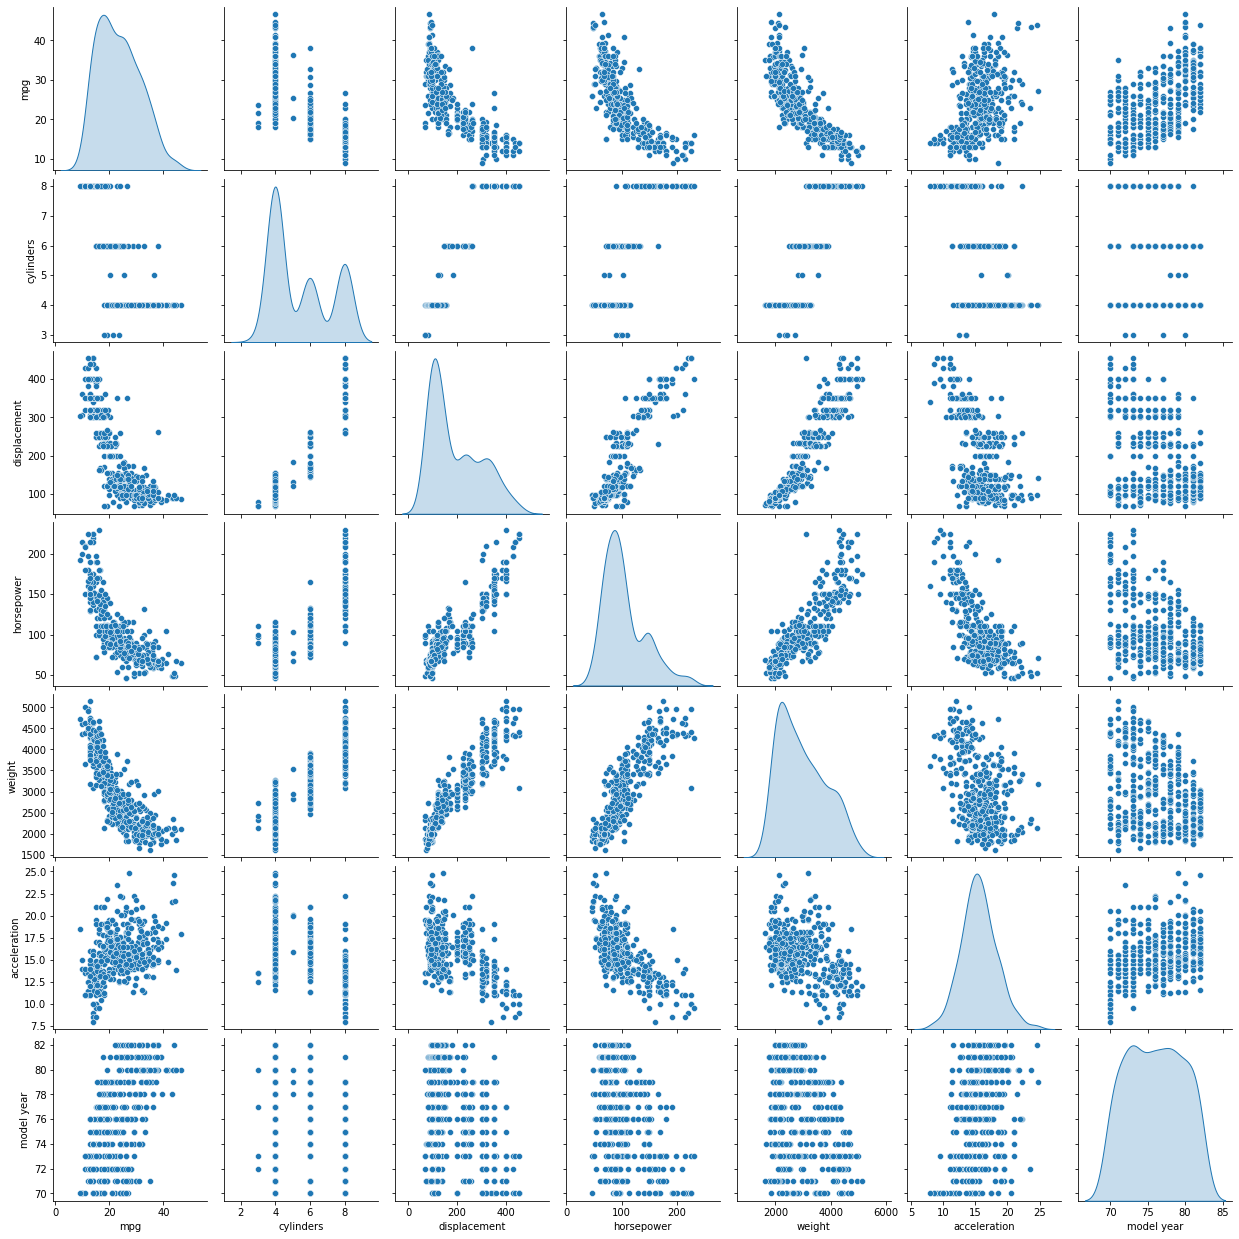

In [36]:
cData_attr = df_cars.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')  

<AxesSubplot:>

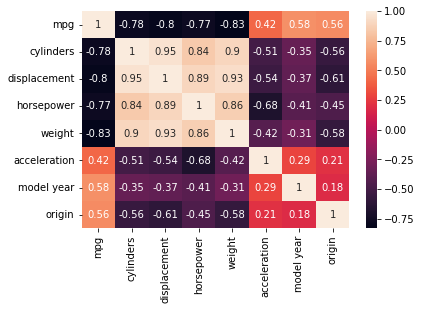

In [37]:
sns.heatmap(df_cars.corr(),annot=True)

In [38]:
df_cars.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick
96,13.0,8,360.0,175.0,3821,11.0,73,1,amc
97,18.0,6,225.0,105.0,3121,16.5,73,1,plymouth
98,16.0,6,250.0,100.0,3278,18.0,73,1,chevrolet


In [39]:
df_cars.to_csv('resolve.csv')

In [40]:
import imblearn
from imblearn.over_sampling import SMOTE

In [41]:
X =df_cars.iloc[:,0:8]
y =df_cars.iloc[:,8]

In [42]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [43]:
y

0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
          ...    
393          ford
394    volkswagen
395         dodge
396          ford
397     chevrolet
Name: name, Length: 398, dtype: object

In [44]:
from collections import Counter

In [45]:
counter = Counter(y)
print(counter)

Counter({'ford': 51, 'chevrolet': 47, 'plymouth': 31, 'amc': 28, 'dodge': 28, 'toyota': 26, 'datsun': 23, 'volkswagen': 22, 'buick': 17, 'pontiac': 16, 'honda': 13, 'mazda': 12, 'mercury': 11, 'oldsmobile': 10, 'peugeot': 8, 'fiat': 8, 'audi': 7, 'chrysler': 6, 'volvo': 6, 'renault': 5, 'saab': 4, 'opel': 4, 'subaru': 4, 'bmw': 2, 'mercedes-benz': 2, 'cadillac': 2, 'hi': 1, 'capri': 1, 'mercedes': 1, 'triumph': 1, 'nissan': 1})


In [46]:
df_cars=df_cars[df_cars.name!='saab']
df_cars=df_cars[df_cars.name!='opel']
df_cars=df_cars[df_cars.name!='subaru']
df_cars=df_cars[df_cars.name!='bmw']
df_cars=df_cars[df_cars.name!='mercedes-benz']
df_cars=df_cars[df_cars.name!='cadillac']
df_cars=df_cars[df_cars.name!='capri']
df_cars=df_cars[df_cars.name!='mercedes']
df_cars=df_cars[df_cars.name!='triumph']
df_cars=df_cars[df_cars.name!='nissan']
df_cars=df_cars[df_cars.name!='hi']
df_cars=df_cars[df_cars.name!='renault']

In [47]:
df_cars.name.value_counts()

ford          51
chevrolet     47
plymouth      31
amc           28
dodge         28
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
Name: name, dtype: int64

In [48]:
X =df_cars.iloc[:,0:8]
y =df_cars.iloc[:,8]

In [49]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [50]:
y

0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
          ...    
393          ford
394    volkswagen
395         dodge
396          ford
397     chevrolet
Name: name, Length: 370, dtype: object

In [51]:
sample_strategy={'ford': 81, 'chevrolet': 77, 'plymouth': 51, 'amc': 38, 'dodge': 58, 'toyota': 46, 'datsun': 43, 'volkswagen': 42, 'buick': 47, 'pontiac': 36, 'honda': 33, 'mazda': 32, 'mercury': 31, 'oldsmobile': 40, 'peugeot': 38, 'fiat': 38, 'audi': 37, 'chrysler': 36, 'volvo': 36}
sm = SMOTE(sampling_strategy=sample_strategy, random_state=0)

In [52]:
X, y = sm.fit_resample(X, y)

C:\Users\Diwakar\Anaconda3\envs\keras-gpu\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (81) in class ford will be larger than the number of samples in the majority class (class #ford -> 51)
  warnings.warn(
C:\Users\Diwakar\Anaconda3\envs\keras-gpu\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (77) in class chevrolet will be larger than the number of samples in the majority class (class #ford -> 51)
  warnings.warn(
C:\Users\Diwakar\Anaconda3\envs\keras-gpu\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (58) in class dodge will be larger than the number of samples in the majority class (class #ford -> 51)
  warnings.warn(


In [53]:
counter = Counter(y)
print(counter)

Counter({'ford': 81, 'chevrolet': 77, 'dodge': 58, 'plymouth': 51, 'buick': 47, 'toyota': 46, 'datsun': 43, 'volkswagen': 42, 'oldsmobile': 40, 'amc': 38, 'peugeot': 38, 'fiat': 38, 'audi': 37, 'pontiac': 36, 'chrysler': 36, 'volvo': 36, 'honda': 33, 'mazda': 32, 'mercury': 31})


In [54]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [55]:
from sklearn.model_selection import train_test_split
#X =df_cars.iloc[:,0:8]
#y =df_cars.iloc[:,8]


In [56]:
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.000000,8,307.000000,130.000000,3504,12.000000,70,1
1,15.000000,8,350.000000,165.000000,3693,11.500000,70,1
2,18.000000,8,318.000000,150.000000,3436,11.000000,70,1
3,16.000000,8,304.000000,150.000000,3433,12.000000,70,1
4,17.000000,8,302.000000,140.000000,3449,10.500000,70,1
...,...,...,...,...,...,...,...,...
835,20.719016,4,126.764429,100.561968,3076,15.268591,75,2
836,18.562968,4,121.000000,112.000000,2896,15.062968,72,2
837,23.235346,4,134.535532,94.138411,3153,16.879238,77,2
838,21.879549,4,121.542029,98.240902,2957,14.572271,75,2


In [57]:
y

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
835        volvo
836        volvo
837        volvo
838        volvo
839        volvo
Name: name, Length: 840, dtype: object

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)


In [59]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [60]:
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix


In [61]:
svm1 = svm.SVC(kernel='rbf',random_state=12,C=100,gamma=1)
svm1.fit(X_train,y_train)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
ff=confusion_matrix(y_test,y_test_pred)
q1=accuracy_score(y_test,y_test_pred)


In [62]:
q1

0.7619047619047619

In [63]:
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

array(['fiat', 'pontiac', 'toyota', 'pontiac', 'chevrolet', 'peugeot',
       'mercury', 'datsun', 'toyota', 'volkswagen', 'oldsmobile', 'dodge',
       'chevrolet', 'audi', 'chevrolet', 'datsun', 'dodge', 'volvo',
       'fiat', 'oldsmobile', 'chevrolet', 'buick', 'pontiac', 'dodge',
       'toyota', 'buick', 'buick', 'plymouth', 'toyota', 'oldsmobile',
       'amc', 'volvo', 'dodge', 'audi', 'buick', 'audi', 'datsun',
       'pontiac', 'mazda', 'oldsmobile', 'pontiac', 'honda', 'volvo',
       'buick', 'pontiac', 'oldsmobile', 'volvo', 'amc', 'dodge', 'honda',
       'ford', 'peugeot', 'fiat', 'pontiac', 'oldsmobile', 'plymouth',
       'oldsmobile', 'oldsmobile', 'ford', 'chevrolet', 'chevrolet',
       'chevrolet', 'chevrolet', 'ford', 'toyota', 'mazda', 'peugeot',
       'datsun', 'volkswagen', 'toyota', 'buick', 'dodge', 'dodge',
       'plymouth', 'mercury', 'ford', 'peugeot', 'dodge', 'plymouth',
       'dodge', 'fiat', 'volvo', 'amc', 'ford', 'datsun', 'toyota',
       'chevro

In [64]:
ff=confusion_matrix(y_test,y_test_pred)

In [65]:
d1=pd.DataFrame(ff)

In [66]:
d1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,5,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,7,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,13,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,4,0,0
6,0,0,1,0,0,0,8,0,0,0,0,0,1,0,0,2,0,0,0
7,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,2,0,0,1,0,11,0,0,1,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0


In [67]:
accuracy_score(y_test,y_test_pred)

0.7619047619047619

In [68]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df

,Actual,Predicted
555,fiat,fiat
39,dodge,pontiac
252,toyota,toyota
541,dodge,pontiac
458,chevrolet,chevrolet
...,...,...
308,volkswagen,volkswagen
660,mercury,dodge
559,fiat,fiat
307,honda,chevrolet


In [ ]:
pii=np.arange(1,1000,10)
pj=np.arange(1,1000,10)
acc=np.zeros((pii.size,pj.size),dtype='float64')
for k,i in enumerate(pii):
    for kk,j in enumerate(pj):
        cost=i
        gama=j
        svm1 = svm.SVC(kernel='rbf',random_state=12,C=cost,gamma=gama,verbose=0)
        svm1.fit(X_train,y_train)
        y_train_pred = svm1.predict(X_train)
        y_test_pred = svm1.predict(X_test)
        ff=confusion_matrix(y_test,y_test_pred)
        q1=accuracy_score(y_test,y_test_pred)
        acc[k][kk]=q1
        del (y_train_pred)
        del (y_test_pred)

In [ ]:
acc.max()

In [ ]:
ind=np.where(acc==acc.max())

In [ ]:
pd.DataFrame(ind)

In [ ]:
pd.DataFrame(acc).to_csv('Result.csv')